# Types of Clustering Methods

### K_means
- Possible application: Clustering different species basec on certain features.  There are clear differences between species generally but sometimes there is overlap, which makes this type of clustering appropriate because it takes into account the mean distances between vectors. 

### Hierarchical Clustering
- Possible application: Clustering different credit card users based features(first age then income then spending habits). This example seems appropriate for hierachical clustering because one could generalize that 'young' people might carry a larger balance relative to their total credit balance, and people who have a higher income might use their credit cards less. These possible differences between young and older people or income might become self evident if a hierarchy is established between the features in the data set.    

In [240]:
import matplotlib.pyplot as plt
import numpy as np
import gzip
import pandas as pd
from sklearn.datasets import load_digits 
img=load_digits()

(1797, 64)


Text(0.5, 1.0, '0')

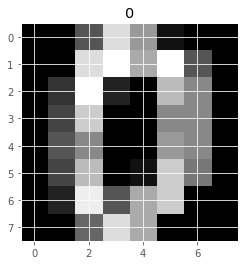

In [241]:
print(img['data'].shape)
images = img['data']
labels= img['target']

plt.imshow(images[0].reshape((8,8)),cmap="gray",)
plt.title(label=labels[0])

In [242]:
img_df = pd.DataFrame()
for i in range(64):
    img_df[f'Pixel{i}']=images[:,i]


In [243]:
img_df

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel54,Pixel55,Pixel56,Pixel57,Pixel58,Pixel59,Pixel60,Pixel61,Pixel62,Pixel63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [244]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(img_df)
scaled_df

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [245]:
from sklearn.cluster import KMeans 
elbow={"inertia":[],"clusters":[]}

for i in range(2,15): 
    model=KMeans(i) 
    elbow["clusters"].append(i) 
    model.fit(scaled_df) 
    elbow["inertia"].append(model.inertia_)

Text(0.5, 1.0, 'K vs Inertia')

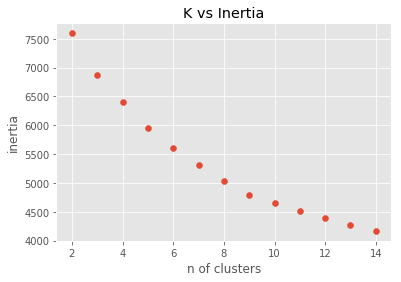

In [246]:
plt.scatter(x=elbow['clusters'], y=elbow['inertia'])
plt.xlabel('n of clusters')
plt.ylabel('inertia')
plt.title("K vs Inertia")

In [247]:
Lit_model = KMeans(10)
Lit_model.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [248]:
from sklearn.manifold import TSNE

tsne = TSNE(2)
arr = tsne.fit_transform(scaled_df)

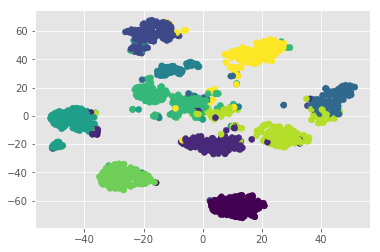

In [249]:
plt.scatter(arr[:,0], arr[:,1],c=Lit_model.labels_)

In [250]:
arr[:,0]

array([ 15.365603 , -17.569614 , -15.065683 , ...,  -6.016369 ,
        25.167177 ,  -2.0415657], dtype=float32)

In [251]:
import plotly.plotly as py
import plotly.graph_objs as go 
py.sign_in('epete358', 'PSjaQEdOSbHqO4LIp7jN')


In [252]:
traces=[] 
for i in range(10):  
    mask=Lit_model.labels_==i
    traces.append(go.Scatter(x=arr[mask][:,0],y=arr[mask][:,1],name=f"cluster {i}",mode="markers")) 
data=go.Data(traces) 
layout=go.Layout(title="KMeans clustering for the digits") 
figure=go.Figure(data,layout) 
py.iplot(figure) 

/Users/ethanpeterson/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


/Users/ethanpeterson/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [253]:
pd_scaled_df = pd.DataFrame(scaled_df)
cluster_map = pd.DataFrame()
cluster_map['data_index'] = pd_scaled_df.index.values
cluster_map['cluster'] = Lit_model.labels_

cluster_1 = cluster_map[cluster_map.cluster == 1]
cluster_1.head()
Lit_model.labels_

array([0, 6, 6, ..., 6, 8, 8], dtype=int32)

Text(0.5, 1.0, 'Cluster 1')

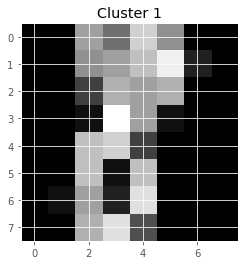

In [254]:
plt.imshow(images[18].reshape((8,8)),cmap="gray",)
plt.title(label= 'Cluster 1')

Text(0.5, 1.0, 'Cluster 1')

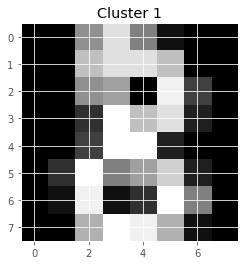

In [255]:
plt.imshow(images[8].reshape((8,8)),cmap="gray",)
plt.title(label= 'Cluster 1')

In [256]:
cluster_2 = cluster_map[cluster_map.cluster == 2]
cluster_2.head()

,data_index,cluster
4,4,2
14,14,2
24,24,2
41,41,2
64,64,2


Text(0.5, 1.0, 'Cluster 2')

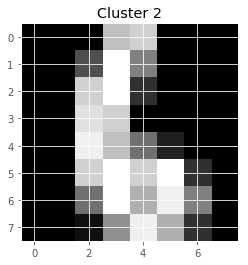

In [257]:
plt.imshow(images[6].reshape((8,8)),cmap="gray",)
plt.title(label= 'Cluster 2')

Text(0.5, 1.0, 'Cluster 2')

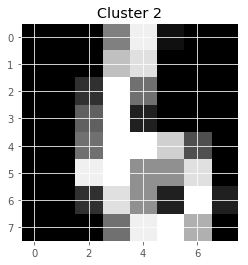

In [258]:
plt.imshow(images[16].reshape((8,8)),cmap="gray",)
plt.title(label= 'Cluster 2')

In [259]:
cluster_9 = cluster_map[cluster_map.cluster == 9]
cluster_9.head()

,data_index,cluster
7,7,9
17,17,9
27,27,9
43,43,9
44,44,9


Text(0.5, 1.0, 'Cluster 9')

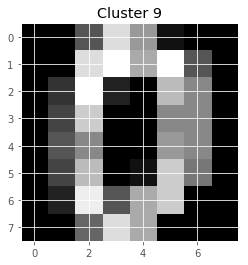

In [260]:
plt.imshow(images[0].reshape((8,8)),cmap="gray",)
plt.title(label= 'Cluster 9')

Text(0.5, 1.0, 'Cluster 9')

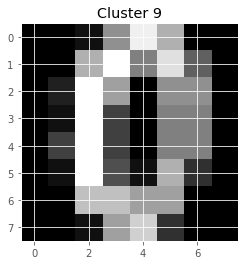

In [261]:
plt.imshow(images[10].reshape((8,8)),cmap="gray",)
plt.title(label= 'Cluster 9')

### K means from Scratch

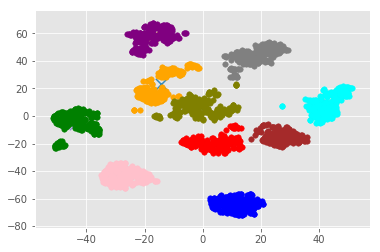

In [262]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

class K_Means:
    
    def __init__(self,k=3, tolerance=0.0001, max_iterations=500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        
    def fit(self, data):
        
        self.centroids = {}
        
        #initilize the centroids, the first 'k' elements in the dataset will be our intitial centroid
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        #begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []
            #find the distance between the point and the cluster; choose the nearest centroid
            
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)
            previous = dict(self.centroids)
            
            #average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)
            
            isOptimal = True

            for centroid in self.centroids:

                original_centroid = previous[centroid]
                curr = self.centroids[centroid]

                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False

            #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                break
        def pred(self, data):
            distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            return classification

scratch = K_Means()
scratch.k = 10
scratch.fit(arr)

# Plotting starts here
colors = 10*['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for centroid in scratch.centroids:
    plt.scatter(scratch.centroids[centroid][0], scratch.centroids[centroid][1], s = 130, marker = "x")

for classification in scratch.classes:
    color = colors[classification]
    for features in scratch.classes[classification]:
        plt.scatter(features[0], features[1],color = color,s = 30)
    
plt.show()

                

In [312]:
arr = pd.DataFrame(arr)
arr['index'] =  pd_scaled_df.index.values
scr_cluster_1 = pd.DataFrame(scratch.classes[0])
scr_cluster_1['scr_cluster'] = 1
scr_cluster_2 = pd.DataFrame(scratch.classes[1])
scr_cluster_2['scr_cluster'] = 2
scr_cluster_3 = pd.DataFrame(scratch.classes[2])
scr_cluster_3['scr_cluster'] = 3
scr_cluster_4 = pd.DataFrame(scratch.classes[3])
scr_cluster_4['scr_cluster'] = 4
scr_cluster_5 = pd.DataFrame(scratch.classes[4])
scr_cluster_5['scr_cluster'] = 5
scr_cluster_6 = pd.DataFrame(scratch.classes[5])
scr_cluster_6['scr_cluster'] = 6
scr_cluster_7 = pd.DataFrame(scratch.classes[6])
scr_cluster_7['scr_cluster'] = 7
scr_cluster_8 = pd.DataFrame(scratch.classes[7])
scr_cluster_8['scr_cluster'] = 8
scr_cluster_9 = pd.DataFrame(scratch.classes[8])
scr_cluster_9['scr_cluster'] = 9
scr_cluster_10 = pd.DataFrame(scratch.classes[9])
scr_cluster_10['scr_cluster'] = 10

df = arr.merge(scr_cluster_1, on=0)
df = df.drop(columns = '1_y')
df.head()


,0,1_x,index,scr_cluster
0,15.365603,-62.676952,0,1
1,18.465599,-62.044552,10,1
2,5.676149,-61.850716,20,1
3,12.006245,-56.923653,30,1
4,6.039892,-59.135468,36,1


Text(0.5, 1.0, 'Scratch Cluster 1')

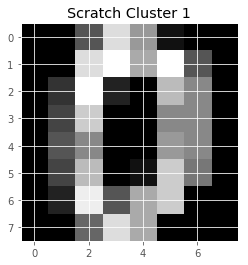

In [313]:
plt.imshow(images[0].reshape((8,8)),cmap="gray",)
plt.title(label= 'Scratch Cluster 1')

Text(0.5, 1.0, 'Scratch Cluster 1')

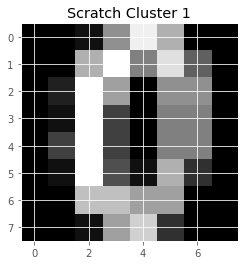

In [314]:
plt.imshow(images[10].reshape((8,8)),cmap="gray",)
plt.title(label= 'Scratch Cluster 1')

In [308]:
df2 = arr.merge(scr_cluster_2, on=0)
df2 = df2.drop(columns = '1_y')
df2.head()

,0,1_x,index,scr_cluster
0,-17.569614,23.099863,1,2
1,-13.104454,33.273758,11,2
2,-12.271018,31.537977,21,2
3,-14.193430,32.566666,42,2
4,-14.402130,30.761879,47,2


Text(0.5, 1.0, 'Cluster 2')

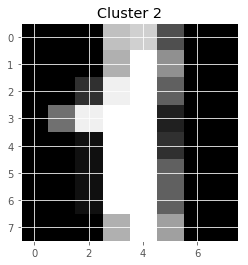

In [318]:
plt.imshow(images[1].reshape((8,8)),cmap="gray",)
plt.title(label= 'Cluster 2')

Text(0.5, 1.0, 'Scratch Cluster 2')

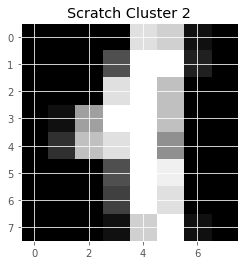

In [317]:
plt.imshow(images[11].reshape((8,8)),cmap="gray",)
plt.title(label= 'Scratch Cluster 2')

In [307]:
df3 = arr.merge(scr_cluster_3, on=0)
df3 = df3.drop(columns = '1_y')
df3.head()

,0,1_x,index,scr_cluster
0,-41.779564,-7.492087,12,3
1,-41.720848,-3.929318,22,3
2,-48.400475,-1.127780,84,3
3,-40.373165,-2.009135,113,3
4,-48.073189,0.845908,132,3


Text(0.5, 1.0, 'Scratch Cluster 3')

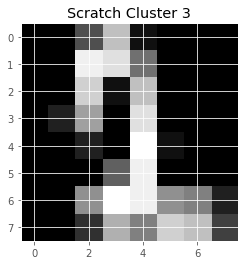

In [320]:
plt.imshow(images[12].reshape((8,8)),cmap="gray",)
plt.title(label= 'Scratch Cluster 3')

Text(0.5, 1.0, 'Cluster 3')

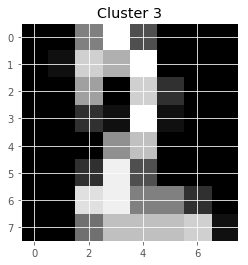

In [319]:
plt.imshow(images[22].reshape((8,8)),cmap="gray",)
plt.title(label= 'Cluster 3')

In [309]:
df4 = arr.merge(scr_cluster_4, on=0)
df4 = df4.drop(columns = '1_y')
df4.head()

,0,1_x,index,scr_cluster
0,8.663078,-17.892910,3,4
1,-0.681496,-19.965282,13,4
2,-6.598107,-17.633913,23,4
3,-2.502876,-22.105690,45,4
4,-2.172722,-17.798864,59,4


Text(0.5, 1.0, 'Cluster 4')

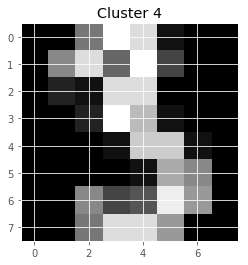

In [321]:
plt.imshow(images[3].reshape((8,8)),cmap="gray",)
plt.title(label= 'Cluster 4')

Text(0.5, 1.0, 'Scratch Cluster 4')

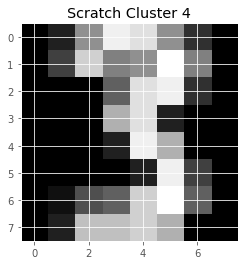

In [322]:
plt.imshow(images[13].reshape((8,8)),cmap="gray",)
plt.title(label= 'Scratch Cluster 4')

In [310]:
df5 = arr.merge(scr_cluster_5, on=0)
df5 = df5.drop(columns = '1_y')
df5.head()

,0,1_x,index,scr_cluster
0,-21.677040,53.548946,4,5
1,-17.374014,56.790951,14,5
2,-20.334389,51.983730,24,5
3,-16.512342,58.035717,41,5
4,-19.193649,56.323578,64,5


Text(0.5, 1.0, 'Cluster 5')

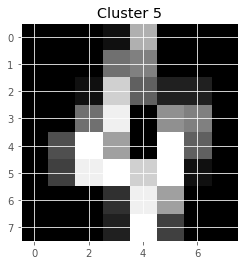

In [325]:
plt.imshow(images[4].reshape((8,8)),cmap="gray",)
plt.title(label= 'Cluster 5')

Text(0.5, 1.0, 'Cluster 5')

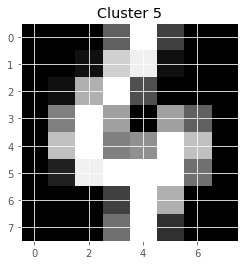

In [328]:
plt.imshow(images[64].reshape((8,8)),cmap="gray",)
plt.title(label= 'Cluster 5')

In [311]:
df6 = arr.merge(scr_cluster_6, on=0)
df6 = df6.drop(columns = '1_y')
df6.head()

,0,1_x,index,scr_cluster
0,21.357134,-14.866677,5,6
1,25.778990,-8.901546,9,6
2,20.469755,-17.605623,19,6
3,20.587435,-16.927517,29,6
4,20.671919,-17.975729,31,6


Text(0.5, 1.0, 'Cluster 6')

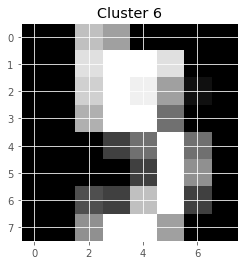

In [329]:
plt.imshow(images[5].reshape((8,8)),cmap="gray",)
plt.title(label= 'Cluster 6')

Text(0.5, 1.0, 'Cluster 6')

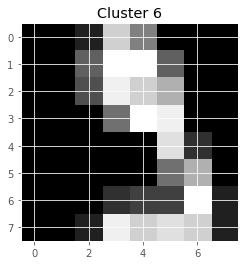

In [332]:
plt.imshow(images[31].reshape((8,8)),cmap="gray",)
plt.title(label= 'Cluster 6')

## It appears the Kmeans from scratch has greater accuracy with its clustering.  